In [118]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timezone

from math import cos, radians
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import matplotlib.patches as mpatches

In [2]:
# no sign for lat because of 'N'
# '-' sign for lon because of 'W'
def dms2dd(as_string):
    degrees = int(as_string[:2])
    minutes = int(as_string[2:4])
    seconds = float(as_string[4:8])
    lat_dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    degrees = -1*int(as_string[10:13])
    minutes = -1*int(as_string[13:15])
    seconds = -1*float(as_string[15:19])
    lon_dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);

    return lat_dd, lon_dd;

In [127]:
def get_color(cluster):
    if cluster == 0:
        return 'black'
    if cluster == 1:
        return 'brown'
    if cluster == 2:
        return 'red'
    if cluster == 3:
        return 'green'
    if cluster == 4:
        return 'cyan'
    if cluster == 5:
        return 'orange'
    if cluster == 6:
        return 'violet'
    if cluster == 7:
        return 'pink'
    if cluster == 8:
        return 'darkblue'
    if cluster == 9:
        return 'blue'
    if cluster == 10:
        return 'lime'
    if cluster == 11:
        return 'sandybrown'
    if cluster == 12:
        return 'darkcyan'
    if cluster == 13:
        return 'magenta'
    if cluster == 14:
        return 'darkviolet'

In [1]:
def plot_TMA_EIDW():
    
    TMA_lon=[-5.5000, -5.5000, -5.5000, -5.5000, -5.5000, -6.6169, -6.8333, -7.3333, -7.3333, -6.7606, -5.5000];

    TMA_lat=[53.9167, 53.7672, 53.0975, 52.7594, 52.3333, 52.6139, 52.7594, 53.0908, 53.7522, 54.1619, 53.9167];
    
    # Runway 10R
    rwy10R_lon=[-6.290075, -6.250578];
    rwy10R_lat=[53.42243, 53.42026];

    # Runway 28L
    rwy28L_lon=[-6.250578, -6.290075];
    rwy28L_lat=[53.42026, 53.42243];

    # Runway 16
    rwy16_lon=[-6.261978, -6.249594];
    rwy16_lat=[53.43699, 53.41991];

    # Runway 34
    rwy34_lon=[6.249594, -6.261978];
    rwy34_lat=[53.41991, 53.43699];

    plt.plot(TMA_lon, TMA_lat, color="blue")
    plt.plot(rwy10R_lon, rwy10R_lat, color="red")
    plt.plot(rwy16_lon, rwy16_lat, color="red")
    
    # Entry Points
    ABLIN_lon = -4.9925
    ABLIN_lat =	52.7828
    BAGSO_lon = -5.5000
    BAGSO_lat =	53.6800
    BAMLI_lon = -6.6511
    BAMLI_lat =	54.1412
    BOYNE_lon = -5.5000
    BOYNE_lat =	53.7671
    BUNED_lon = -6.6301
    BUNED_lat =	52.6228
    LIPGO_lon = -5.5000
    LIPGO_lat =	53.0639
    NIMAT_lon = -5.7421
    NIMAT_lat =	53.9650
    OLAPO_lon = -7.2946
    OLAPO_lat =	53.7803
    OSGAR_lon = -7.2702
    OSGAR_lat =	53.0494
    SUTEX_lon = -6.9304
    SUTEX_lat =	52.8244
    VATRY_lon = -5.5000
    VATRY_lat =	52.5544

    plt.plot(ABLIN_lon, ABLIN_lat, 'ro')
    plt.plot(BAGSO_lon, BAGSO_lat, 'ro')
    plt.plot(BAMLI_lon, BAMLI_lat, 'ro')
    plt.plot(BOYNE_lon, BOYNE_lat, 'ro')
    plt.plot(BUNED_lon, BUNED_lat, 'ro')
    plt.plot(LIPGO_lon, LIPGO_lat, 'ro')
    plt.plot(NIMAT_lon, NIMAT_lat, 'ro')
    plt.plot(OLAPO_lon, OLAPO_lat, 'ro')
    plt.plot(OSGAR_lon, OSGAR_lat, 'ro')
    plt.plot(SUTEX_lon, SUTEX_lat, 'ro')
    plt.plot(VATRY_lon, VATRY_lat, 'ro')
    
    SIVNA_lat, SIVNA_lon = dms2dd("531152.3N 0053827.7W")
    KOGAX_lat, KOGAX_lon = dms2dd("533418.6N 0053814.1E")
    
    plt.plot(SIVNA_lon, SIVNA_lat, 'ro')
    plt.plot(KOGAX_lon, KOGAX_lat, 'ro')
    
    SIVNA_square_lon = [SIVNA_lon - 0.05, SIVNA_lon - 0.05, SIVNA_lon + 0.05, SIVNA_lon + 0.05, SIVNA_lon - 0.05]
    SIVNA_square_lat = [SIVNA_lat - 0.05, SIVNA_lat + 0.05, SIVNA_lat + 0.05, SIVNA_lat - 0.05, SIVNA_lat - 0.05]

    #KOGAX_square_lon = [KOGAX_lon - 0.05, KOGAX_lon - 0.05, KOGAX_lon + 0.05, KOGAX_lon + 0.05, KOGAX_lon - 0.05]
    #KOGAX_square_lat = [KOGAX_lat - 0.05, KOGAX_lat + 0.05, KOGAX_lat + 0.05, KOGAX_lat - 0.05, KOGAX_lat - 0.05]
    KOGAX_square_lon = [KOGAX_lon - 0.04, KOGAX_lon - 0.04, KOGAX_lon + 0.04, KOGAX_lon + 0.04, KOGAX_lon - 0.04]
    KOGAX_square_lat = [KOGAX_lat - 0.03, KOGAX_lat + 0.03, KOGAX_lat + 0.03, KOGAX_lat - 0.03, KOGAX_lat - 0.03]
        
    #plt.plot(SIVNA_square_lon, SIVNA_square_lat, color="red")
    #plt.plot(KOGAX_square_lon, KOGAX_square_lat, color="red")
    
    rwy28L_around_lon=[-6.2,   -6.2,   -6.35 ,  -6.35, -6.2];
    rwy28L_around_lat=[53.37, 53.47, 53.47, 53.37, 53.37];
    
    #plt.plot(rwy28L_around_lon, rwy28L_around_lat)
    
    rwy28L_left_lon=[-6.29,   -6.29,   -6.4 ,  -6.4, -6.29];
    rwy28L_left_lat=[53.27, 53.57, 53.57, 53.27, 53.27];
    
    #plt.plot(rwy28L_left_lon, rwy28L_left_lat)
    
    rwy28L_down_lon=[-6.29,   -6.29,   -6.19 ,  -6.19, -6.29];
    rwy28L_down_lat=[53.32, 53.37, 53.37, 53.32, 53.32];

    #plt.plot(rwy28L_down_lon, rwy28L_down_lat)
    
    rwy28L_up_lon=[-6.19,   -6.19,   -6.09 ,  -6.09, -6.19];
    rwy28L_up_lat=[53.50, 53.55, 53.55, 53.50, 53.50];

    #plt.plot(rwy28L_up_lon, rwy28L_up_lat)
    
    left_circle_center_lon = -6.35
    left_circle_center_lat =53.42
    left_circle2_center_lon = -6.3
    left_circle2_center_lat =53.45
    down_circle_center_lon = -6.23
    down_circle_center_lat = 53.35
    up_circle_center_lon = -6.14
    up_circle_center_lat = 53.46
    up_circle2_center_lon = -6.1
    up_circle2_center_lat = 53.46
    
    ax = plt.gca()
    circle = plt.Circle((left_circle_center_lon, left_circle_center_lat), 0.052, fill=False, color="red")
    #ax.add_patch(circle)
    circle = plt.Circle((down_circle_center_lon, down_circle_center_lat), 0.029, fill=False, color="red")
    #ax.add_patch(circle)
    circle = plt.Circle((up_circle_center_lon, up_circle_center_lat), 0.028, fill=False, color="red")
    #ax.add_patch(circle)
    
    circle = plt.Circle((left_circle2_center_lon, left_circle2_center_lat), 0.029, fill=False, color="red")
    #ax.add_patch(circle)
    circle = plt.Circle((up_circle2_center_lon, up_circle2_center_lat), 0.023, fill=False, color="red")
    #ax.add_patch(circle)
    
    center_lon = -6.3
    center_lat = 53.3
    circle = plt.Circle((center_lon, center_lat), 0.67, fill=False, color="red")
    #circle = plt.Circle((center_lon, center_lat), 0.75, fill=False, color="red")
    #circle = plt.Circle((center_lon, center_lat), 0.83, fill=False, color="red")
    #ax.add_patch(circle)

In [149]:
def plot_legend(number_of_clusters):
    handles = []
    for i in range(0, number_of_clusters):
        cluster_color = get_color(i)
        color_patch = mpatches.Patch(color=cluster_color, label='cluster ' + str(i+1))
        handles += [color_patch]
    plt.legend(handles=handles, fontsize=10, loc="best")

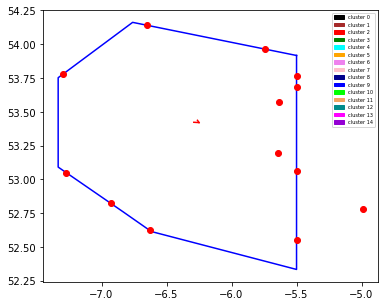

In [134]:
fig, ax = plt.subplots(1, 1,figsize=(6,5))
plot_TMA_EIDW()
plot_legend(15)

In [ ]:
def plot_STAR_ABLIN():
    ABLIN_lat, ABLIN_lon = dms2dd("524658.0N 0045933.0W")
    IRKUM_lat, IRKUM_lon = dms2dd("525948.0N 0052239.0W")
    LIPGO_lat, LIPGO_lon = dms2dd("530350.1N 0053000.0W")
    PEKOK_lat, PEKOK_lon = dms2dd("530739.3N 0053400.8W")
    SIVNA_lat, SIVNA_lon = dms2dd("531152.3N 0053827.7W")
    LAPMO_lat, LAPMO_lon = dms2dd("532411.0N 0055644.1W")
    
    FAP_28L_lat, FAP_28L_lon = 53.4094, -6.0545    
    rwy28L_lat, rwy28L_lon = 53.42026, -6.250578
    
    # ABLIN2X STAR RWY 28L
    #STAR_lon = [ABLIN_lon, IRKUM_lon, LIPGO_lon, PEKOK_lon, SIVNA_lon, LAPMO_lon, FAP_28L_lon, rwy28L_lon]
    #STAR_lat = [ABLIN_lat, IRKUM_lat, LIPGO_lat, PEKOK_lat, SIVNA_lat, LAPMO_lat, FAP_28L_lat, rwy28L_lat]

    STAR_lon = [LIPGO_lon, PEKOK_lon, SIVNA_lon, LAPMO_lon, FAP_28L_lon, rwy28L_lon]
    STAR_lat = [LIPGO_lat, PEKOK_lat, SIVNA_lat, LAPMO_lat, FAP_28L_lat, rwy28L_lat]
    
    plt.plot(STAR_lon, STAR_lat, color="red")

In [ ]:
def plot_STAR_BAGSO():
    BAGSO_lat, BAGSO_lon = dms2dd("534048.0N 0053000.0E")
    ADSIS_lat, ADSIS_lon = dms2dd("534103.1N 0053934.0E")
    KERAV_lat, KERAV_lon = dms2dd("533742.7N 0054557.3E")
    KOGAX_lat, KOGAX_lon = dms2dd("533418.6N 0053814.1E")
    LAPMO_lat, LAPMO_lon = dms2dd("532411.0N 0055644.1E")
    
    FAP_28L_lat, FAP_28L_lon = 53.4094, -6.0545    
    rwy28L_lat, rwy28L_lon = 53.42026, -6.250578
    
    # BAGSO2X STAR RWY 28L
    STAR_lon = [BAGSO_lon, ADSIS_lon, KERAV_lon, KOGAX_lon, LAPMO_lon, FAP_28L_lon, rwy28L_lon]
    STAR_lat = [BAGSO_lat, ADSIS_lat, KERAV_lat, KOGAX_lat, LAPMO_lat, FAP_28L_lat, rwy28L_lat]
    
    plt.plot(STAR_lon, STAR_lat, color="red")

In [ ]:
def plot_STAR_BAMLI():
    BAMLI_lat, BAMLI_lon = dms2dd("540828.5N 0063904.0E")
    RONON_lat, RONON_lon = dms2dd("534233.9N 0063619.2E")
    ORVEN_lat, ORVEN_lon = dms2dd("533953.5N 0061129.8E")
    GIRAS_lat, GIRAS_lon = dms2dd("533821.0N 0055733.2E")
    KERAV_lat, KERAV_lon = dms2dd("533742.7N 0054557.3E")
    KOGAX_lat, KOGAX_lon = dms2dd("533418.6N 0053814.1E")
    LAPMO_lat, LAPMO_lon = dms2dd("532411.0N 0055644.1E")
    
    FAP_28L_lat, FAP_28L_lon = 53.4094, -6.0545    
    rwy28L_lat, rwy28L_lon = 53.42026, -6.250578
    
    # BAMLI2X STAR RWY 28L 
    STAR_lon = [BAMLI_lon, RONON_lon, ORVEN_lon, GIRAS_lon, KERAV_lon, KOGAX_lon, LAPMO_lon, FAP_28L_lon, rwy28L_lon]
    STAR_lat = [BAMLI_lat, RONON_lat, ORVEN_lat, GIRAS_lat, KERAV_lat, KOGAX_lat, LAPMO_lat, FAP_28L_lat, rwy28L_lat]
    
    plt.plot(STAR_lon, STAR_lat, color="red")

In [ ]:
def plot_STAR_BOYNE():
    BOYNE_lat, BOYNE_lon = dms2dd("534601.6N 0053000.0E")
    ADSIS_lat, ADSIS_lon = dms2dd("534103.1N 0053934.0E")
    KERAV_lat, KERAV_lon = dms2dd("533742.7N 0054557.3E")
    KOGAX_lat, KOGAX_lon = dms2dd("533418.6N 0053814.1E")
    LAPMO_lat, LAPMO_lon = dms2dd("532411.0N 0055644.1E")
    
    FAP_28L_lat, FAP_28L_lon = 53.4094, -6.0545    
    rwy28L_lat, rwy28L_lon = 53.42026, -6.250578
    
    # BOYNE2X STAR RWY 28L
    STAR_lon = [BOYNE_lon, ADSIS_lon, KERAV_lon, KOGAX_lon, LAPMO_lon, FAP_28L_lon, rwy28L_lon]
    STAR_lat = [BOYNE_lat, ADSIS_lat, KERAV_lat, KOGAX_lat, LAPMO_lat, FAP_28L_lat, rwy28L_lat]
    
    plt.plot(STAR_lon, STAR_lat, color="red")
    
    ADSIS_square_lon = [ADSIS_lon - 0.06, ADSIS_lon - 0.06, ADSIS_lon + 0.06, ADSIS_lon + 0.06, ADSIS_lon - 0.06]
    ADSIS_square_lat = [ADSIS_lat - 0.04, ADSIS_lat + 0.04, ADSIS_lat + 0.04, ADSIS_lat - 0.04, ADSIS_lat - 0.04]
    #plt.plot(ADSIS_square_lon, ADSIS_square_lat)
    
    KERAV_square_lon = [KERAV_lon - 0.04, KERAV_lon - 0.04, KERAV_lon + 0.04, KERAV_lon + 0.04, KERAV_lon - 0.04]
    KERAV_square_lat = [KERAV_lat - 0.03, KERAV_lat + 0.03, KERAV_lat + 0.03, KERAV_lat - 0.03, KERAV_lat - 0.03]
    plt.plot(KERAV_square_lon, KERAV_square_lat)
    
    square_lon = [KERAV_lon, KERAV_lon, ADSIS_lon, ADSIS_lon, KERAV_lon]
    square_lat = [KERAV_lat, ADSIS_lat, ADSIS_lat, KERAV_lat, KERAV_lat]
    #plt.plot(square_lon, square_lat)

In [ ]:
def plot_STAR_BUNED():
    BUNED_lat, BUNED_lon = dms2dd("523721.9N 0063748.2E")
    DIRUM_lat, DIRUM_lon = dms2dd("530009.7N 0063940.0E")
    KEPOR_lat, KEPOR_lon = dms2dd("531016.5N 0062200.7E")
    ARVOK_lat, ARVOK_lon = dms2dd("530919.0N 0060335.1E")
    SORIN_lat, SORIN_lon = dms2dd("530829.3N 0054822.5E")
    SIVNA_lat, SIVNA_lon = dms2dd("531152.3N 0053827.7E")
    LAPMO_lat, LAPMO_lon = dms2dd("532411.0N 0055644.1E")
    
    FAP_28L_lat, FAP_28L_lon = 53.4094, -6.0545    
    rwy28L_lat, rwy28L_lon = 53.42026, -6.250578

    # BUNED2X STAR RWY 28L
    STAR_lon = [BUNED_lon, DIRUM_lon, KEPOR_lon, ARVOK_lon, SORIN_lon, SIVNA_lon, LAPMO_lon, FAP_28L_lon, rwy28L_lon]
    STAR_lat = [BUNED_lat, DIRUM_lat, KEPOR_lat, ARVOK_lat, SORIN_lat, SIVNA_lat, LAPMO_lat, FAP_28L_lat, rwy28L_lat]
    
    plt.plot(STAR_lon, STAR_lat, color="red")

In [ ]:
def plot_STAR_NIMAT():
    NIMAT_lat, NIMAT_lon = dms2dd("535754.1N 0054431.7E")
    KERAV_lat, KERAV_lon = dms2dd("533742.7N 0054557.3E")
    KOGAX_lat, KOGAX_lon = dms2dd("533418.6N 0053814.1E")
    LAPMO_lat, LAPMO_lon = dms2dd("532411.0N 0055644.1E")
    
    FAP_28L_lat, FAP_28L_lon = 53.4094, -6.0545    
    rwy28L_lat, rwy28L_lon = 53.42026, -6.250578

    # NIMAT2X STAR RWY 28L
    STAR_lon = [NIMAT_lon, KERAV_lon, KOGAX_lon, LAPMO_lon, FAP_28L_lon, rwy28L_lon]
    STAR_lat = [NIMAT_lat, KERAV_lat, KOGAX_lat, LAPMO_lat, FAP_28L_lat, rwy28L_lat]
    
    plt.plot(STAR_lon, STAR_lat, color="red")

In [ ]:
def plot_STAR_OLAPO():
    OLAPO_lat, OLAPO_lon = dms2dd("534649.0N 0071740.6")
    RONON_lat, RONON_lon = dms2dd("534233.9N 0063619.2E")
    ORVEN_lat, ORVEN_lon = dms2dd("533953.5N 0061129.8E")
    GIRAS_lat, GIRAS_lon = dms2dd("533821.0N 0055733.2E")
    KERAV_lat, KERAV_lon = dms2dd("533742.7N 0054557.3E")
    KOGAX_lat, KOGAX_lon = dms2dd("533418.6N 0053814.1E")
    LAPMO_lat, LAPMO_lon = dms2dd("532411.0N 0055644.1E")
       
    FAP_28L_lat, FAP_28L_lon = 53.4094, -6.0545    
    rwy28L_lat, rwy28L_lon = 53.42026, -6.250578
    
    # OLAPO2X STAR RWY 28L
    STAR_lon = [OLAPO_lon, RONON_lon, ORVEN_lon, GIRAS_lon, KERAV_lon, KOGAX_lon, LAPMO_lon, FAP_28L_lon, rwy28L_lon]
    STAR_lat = [OLAPO_lat, RONON_lat, ORVEN_lat, GIRAS_lat, KERAV_lat, KOGAX_lat, LAPMO_lat, FAP_28L_lat, rwy28L_lat]
    
    plt.plot(STAR_lon, STAR_lat, color="red")

In [ ]:
def plot_STAR_OSGAR():
    OSGAR_lat, OSGAR_lon = dms2dd("530257.9N 0071612.8W")
    DIRUM_lat, DIRUM_lon = dms2dd("530009.7N 0063940.0W")
    KEPOR_lat, KEPOR_lon = dms2dd("531016.5N 0062200.7W")
    ARVOK_lat, ARVOK_lon = dms2dd("530919.0N 0060335.1W")
    SORIN_lat, SORIN_lon = dms2dd("530829.3N 0054822.5W")
    SIVNA_lat, SIVNA_lon = dms2dd("531152.3N 0053827.7W")
    LAPMO_lat, LAPMO_lon = dms2dd("532411.0N 0055644.1W")
    
    FAP_28L_lat, FAP_28L_lon = 53.4094, -6.0545    
    rwy28L_lat, rwy28L_lon = 53.42026, -6.250578
    
    # OSGAR2X STAR RWY 28L
    STAR_lon = [OSGAR_lon, DIRUM_lon, KEPOR_lon, ARVOK_lon, SORIN_lon, SIVNA_lon, LAPMO_lon, FAP_28L_lon, rwy28L_lon]
    STAR_lat = [OSGAR_lat, DIRUM_lat, KEPOR_lat, ARVOK_lat, SORIN_lat, SIVNA_lat, LAPMO_lat, FAP_28L_lat, rwy28L_lat]
    
    plt.plot(STAR_lon, STAR_lat, color="red")

In [ ]:
def plot_STAR_SUTEX():
    SUTEX_lat, SUTEX_lon = dms2dd("524927.7N 0065549.3")
    DIRUM_lat, DIRUM_lon = dms2dd("530009.7N 0063940.0E")
    KEPOR_lat, KEPOR_lon = dms2dd("531016.5N 0062200.7E")
    ARVOK_lat, ARVOK_lon = dms2dd("530919.0N 0060335.1E")
    SORIN_lat, SORIN_lon = dms2dd("530829.3N 0054822.5E")
    SIVNA_lat, SIVNA_lon = dms2dd("531152.3N 0053827.7E")
    LAPMO_lat, LAPMO_lon = dms2dd("532411.0N 0055644.1E")
    
    FAP_28L_lat, FAP_28L_lon = 53.4094, -6.0545    
    rwy28L_lat, rwy28L_lon = 53.42026, -6.250578
    
    # SUTEX2X STAR RWY 28L
    STAR_lon = [SUTEX_lon, DIRUM_lon, KEPOR_lon, ARVOK_lon, SORIN_lon, SIVNA_lon, LAPMO_lon, FAP_28L_lon, rwy28L_lon]
    STAR_lat = [SUTEX_lat, DIRUM_lat, KEPOR_lat, ARVOK_lat, SORIN_lat, SIVNA_lat, LAPMO_lat, FAP_28L_lat, rwy28L_lat]
    
    plt.plot(STAR_lon, STAR_lat, color="red")

In [ ]:
def plot_STAR_VATRY():
    VATRY_lat, VATRY_lon = dms2dd("523316.0N 0053000.0E")
    SORIN_lat, SORIN_lon = dms2dd("530829.3N 0054822.5E")
    SIVNA_lat, SIVNA_lon = dms2dd("531152.3N 0053827.7E")
    LAPMO_lat, LAPMO_lon = dms2dd("532411.0N 0055644.1E")
    
    FAP_28L_lat, FAP_28L_lon = 53.4094, -6.0545    
    rwy28L_lat, rwy28L_lon = 53.42026, -6.250578
    
    # VATRY2X STAR RWY 28L
    STAR_lon = [VATRY_lon, SORIN_lon, SIVNA_lon, LAPMO_lon, FAP_28L_lon, rwy28L_lon]
    STAR_lat = [VATRY_lat, SORIN_lat, SIVNA_lat, LAPMO_lat, FAP_28L_lat, rwy28L_lat]
    
    plt.plot(STAR_lon, STAR_lat, color="red")

In [6]:
 def plot_horizontal_profile_EIDW(df, runway, linewidth):
    
    #plt.figure(figsize=(6,6))
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    
    central_latitude = 53.25
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_latitude))

    # set the aspect ratio of the axes to that
    ax.set_aspect(mercator_aspect_ratio)

    #plt.axes().set_aspect('equal')
    
    #ax.set_aspect('equal', adjustable='box')
    #ax.set_xlim(16,20)
    #ax.set_ylim(57.5,61.5)
    
    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)
    
    plot_TMA_EIDW()
    
    if df.empty:
        return
    
    for flight_id, new_df in df.groupby(level='flight_id'):
        #print(flight_id)
        flight_states_opensky_df = df.loc[(flight_id,), :]
        lon = []
        lat = []
        for seq, row in flight_states_opensky_df.groupby(level='sequence'):
        
            if row['lon'].item() != 0:
                lon.append(row['lon'].item())
            if row['lat'].item() != 0:
                lat.append(row['lat'].item())
            
        last_points_lon = lon[-30:]
        last_points_lat = lat[-30:]
        #plt.plot(lon, lat, color='k', linewidth=linewidth)
        plt.plot(lon, lat, linewidth=linewidth)
        #plt.plot(last_points_lon, last_points_lat, color='r', linewidth=linewidth)

In [137]:
def plot_horizontal_profile_EIDW_clustering(df, runway, linewidth, number_of_clusters, clustering_df):
    
    #plt.figure(figsize=(6,6))
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    
    central_latitude = 53.25
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_latitude))

    # set the aspect ratio of the axes to that
    ax.set_aspect(mercator_aspect_ratio)

    #plt.axes().set_aspect('equal')
    
    #ax.set_aspect('equal', adjustable='box')
    #ax.set_xlim(16,20)
    #ax.set_ylim(57.5,61.5)
    
    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)
    
    plot_TMA_EIDW()
    
    if df.empty:
        return
    
    for flight_id, new_df in df.groupby(level='flight_id'):
        #print(flight_id)
        flight_states_opensky_df = df.loc[(flight_id,), :]
        lon = []
        lat = []
        for seq, row in flight_states_opensky_df.groupby(level='sequence'):
        
            if row['lon'].item() != 0:
                lon.append(row['lon'].item())
            if row['lat'].item() != 0:
                lat.append(row['lat'].item())
            
        last_points_lon = lon[-30:]
        last_points_lat = lat[-30:]
        #plt.plot(lon, lat, color='k', linewidth=linewidth)
        cluster_color = get_color(clustering_df.loc[flight_id]['cluster'])
        plt.plot(lon, lat, color = cluster_color, linewidth=linewidth)
        #plt.plot(last_points_lon, last_points_lat, color='r', linewidth=linewidth)
    plot_legend(number_of_clusters)

In [ ]:
def plot_vertical_profile(flight_df, final_approach, linewidth):
    
    df = flight_df[flight_df['altitude']>=final_approach]
       
    for flight_id, flight_id_group in df.groupby(level='flight_id'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_id_group['altitude'].tolist()
            opensky_states_times = flight_id_group.index.get_level_values('sequence').tolist()

            prev_altitude = final_approach
                
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)


In [ ]:
def plot_raw_vertical_profile(flight_df, final_approach, linewidth):
    
    df = flight_df[flight_df['altitude']>=final_approach]
       
    for flight_id, flight_id_group in df.groupby(level='flight_id'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_id_group['rawAltitude'].tolist()
            opensky_states_times = flight_id_group.index.get_level_values('sequence').tolist()

            prev_altitude = final_approach
                
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)

# Data uploading

In [76]:
filename = "../data/EIDW/2019/Dataset/EIDW_dataset_PM.csv"
dataset_PM_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
dataset_PM_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/EIDW/2019/PIs/PIs_horizontal_by_flight_dataset.csv"
horizontal_PIs_by_flight_df = pd.read_csv(filename, sep=' ')
horizontal_PIs_by_flight_df.set_index(['flight_id'], inplace=True)

number_of_flights = len(dataset_PM_df.groupby(level='flight_id'))
print(number_of_flights)

filename = "../data/EIDW/2019/Dataset/EIDW_dataset_TT_with_go_around.csv"
dataset_TT1_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
dataset_TT1_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/EIDW/2019/Dataset/EIDW_dataset_TT.csv"
dataset_TT_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
dataset_TT_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/EIDW/2019/Dataset/EIDW_dataset_TT_remove_flight_ids.txt"
removed_flight_ids_list = open(filename,'r').read().split('\n')

#filename = "../data/EIDW/2019/PIs/PIs_vertical_by_flight_2019_10_week1.csv"
#filename = "../data/EIDW/2019/PIs/PIs_vertical_by_flight_2019_10_week1_rwy28.csv"
#vertical_PIs_by_flight_df = pd.read_csv(filename, sep=' ')

#filename = "../data/EIDW/2019/PIs/PIs_vertical_by_hour_2019_10_week1.csv"
#filename = "../data/EIDW/2019/PIs/PIs_vertical_by_hour_2019_10_week1_rwy28.csv"
#vertical_PIs_by_hour_df = pd.read_csv(filename, sep=' ')

2843


In [168]:
print(dataset_TT_df.head(1))

                        timestamp     lat    lon  rawAltitude  altitude  \
flight_id    sequence                                                     
191001BAW834 0         1569930213  53.681 -5.501       3916.0    3875.0   

                       velocity    date  
flight_id    sequence                    
191001BAW834 0            145.0  191001  


In [166]:
number_of_clusters = 11
#filename = "../data/EIDW/2019/Clustering/EIDW_dataset_PM_circle40_clusters_" + str(number_of_clusters) + ".csv"
filename = "../data/EIDW/2019/Clustering/EIDW_dataset_PM_TMA_borders_clusters_" + str(number_of_clusters) + ".csv"
dataset_PM_clusters_df = pd.read_csv(filename, sep=' ')
dataset_PM_clusters_df.set_index(['flight_id'], inplace=True)

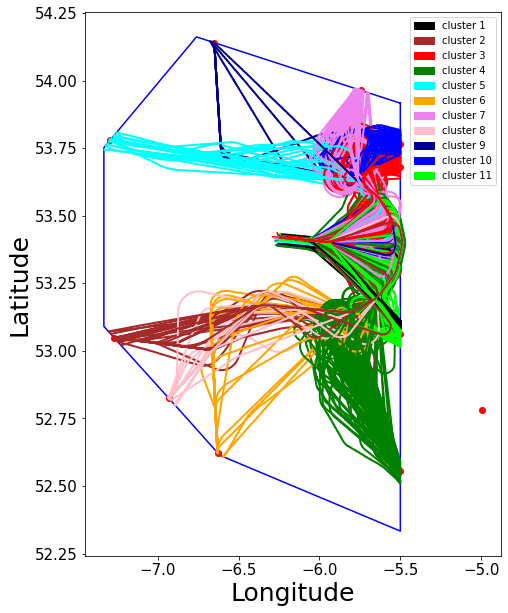

In [167]:
plot_horizontal_profile_EIDW_clustering(dataset_PM_df, 'x', 2, number_of_clusters, dataset_PM_clusters_df)

In [158]:
number_of_clusters = 15
#filename = "../data/EIDW/2019/Clustering/EIDW_dataset_TT_circle40_clusters_" + str(number_of_clusters) + ".csv"
filename = "../data/EIDW/2019/Clustering/EIDW_dataset_TT_TMA_borders_clusters_" + str(number_of_clusters) + ".csv"
dataset_TT_clusters_df = pd.read_csv(filename, sep=' ')
dataset_TT_clusters_df.set_index(['flight_id'], inplace=True)

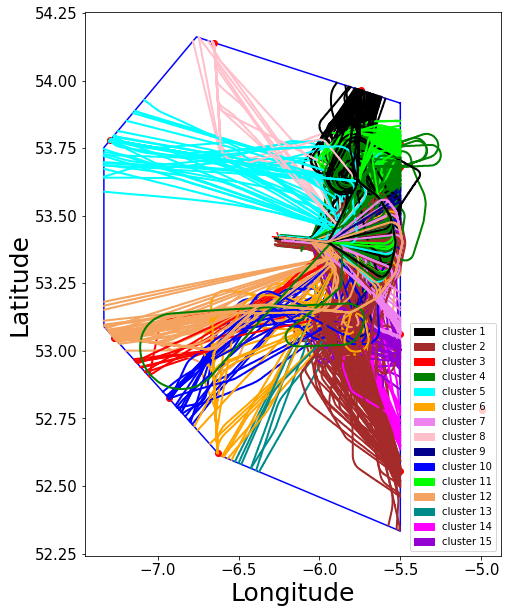

In [159]:
plot_horizontal_profile_EIDW_clustering(dataset_TT_df, 'x', 2, number_of_clusters, dataset_TT_clusters_df)

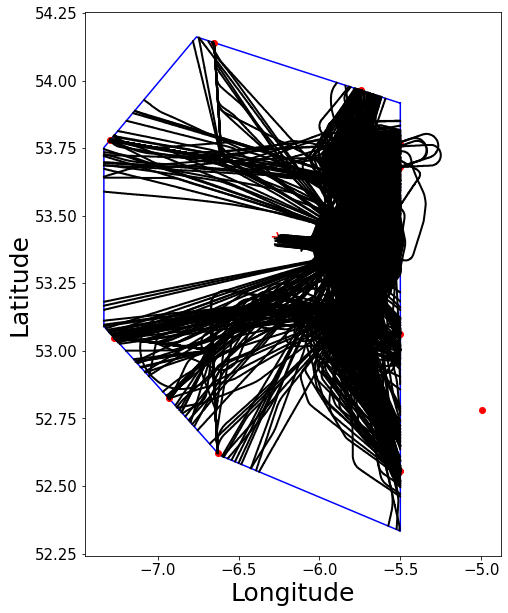

In [45]:
plot_horizontal_profile_EIDW(dataset_TT_df, 'x', 2)

<ipython-input-6-b0c557c28ab5>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1,figsize=(10,10))


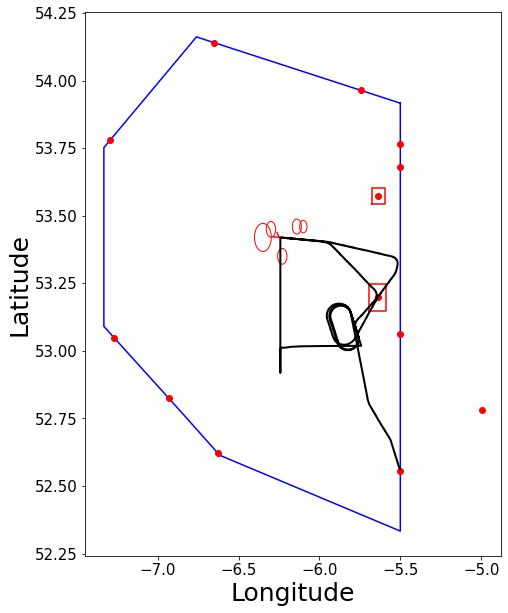

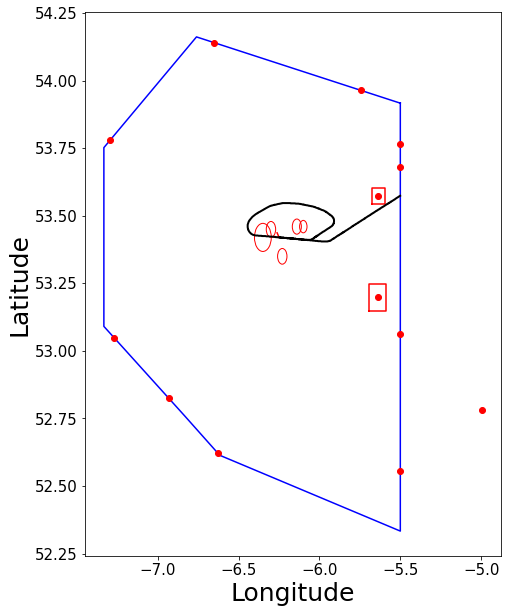

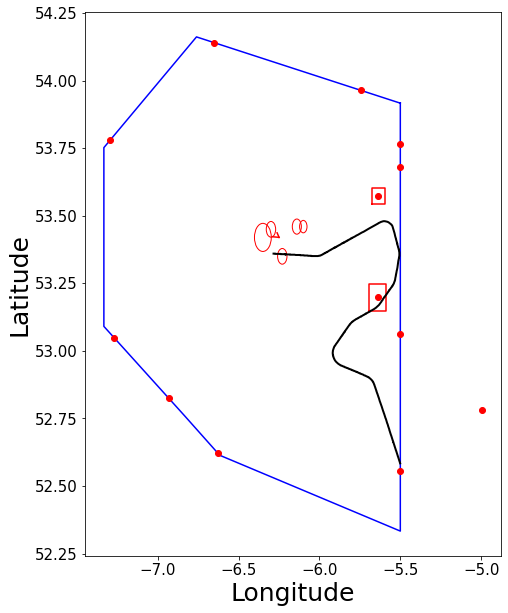

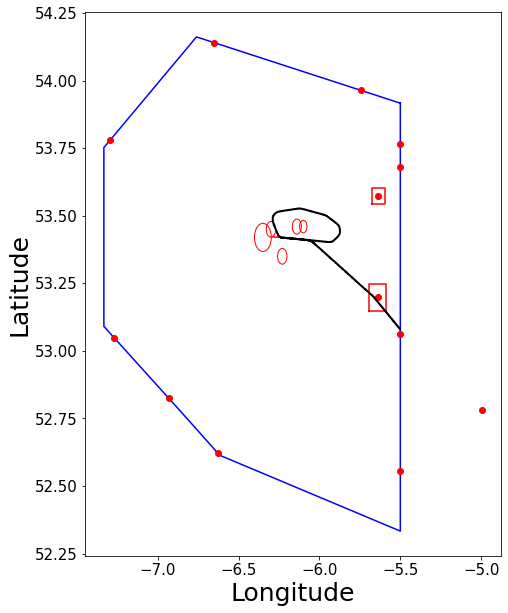

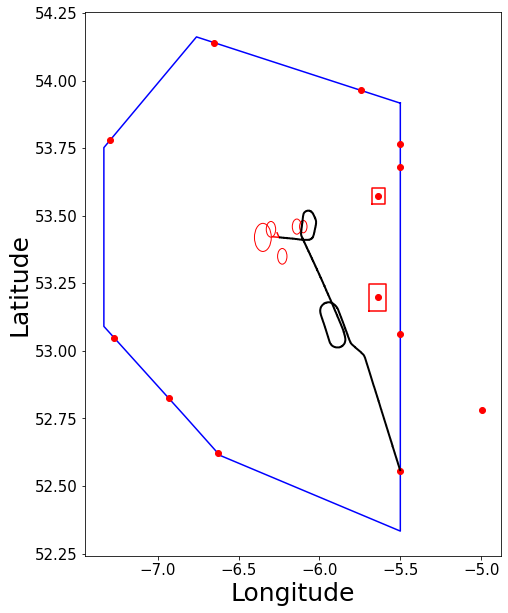

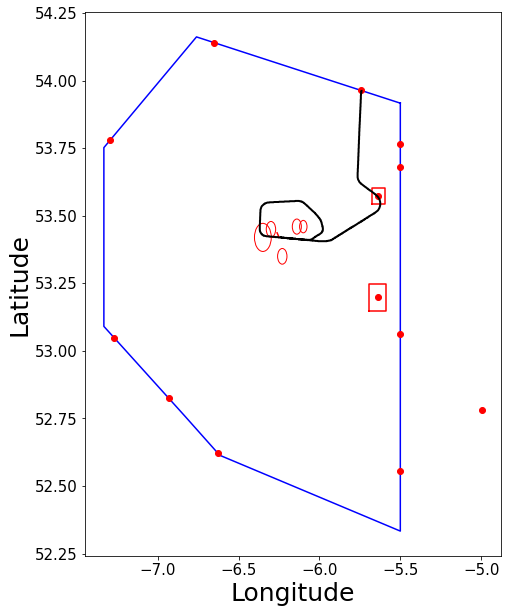

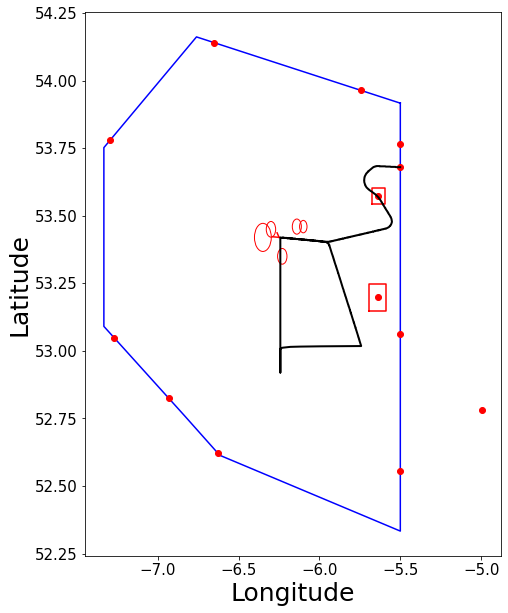

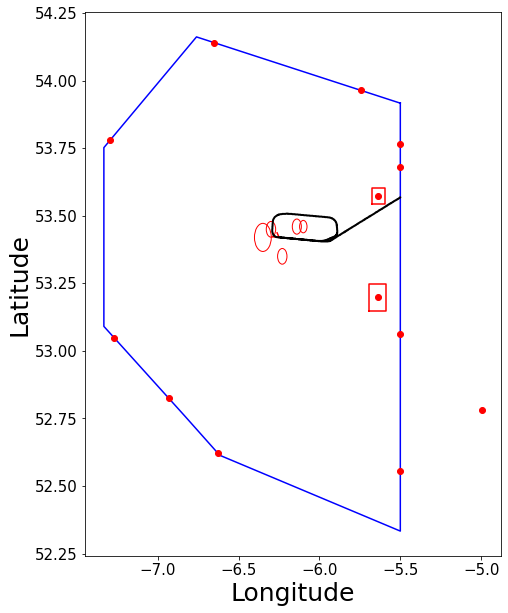

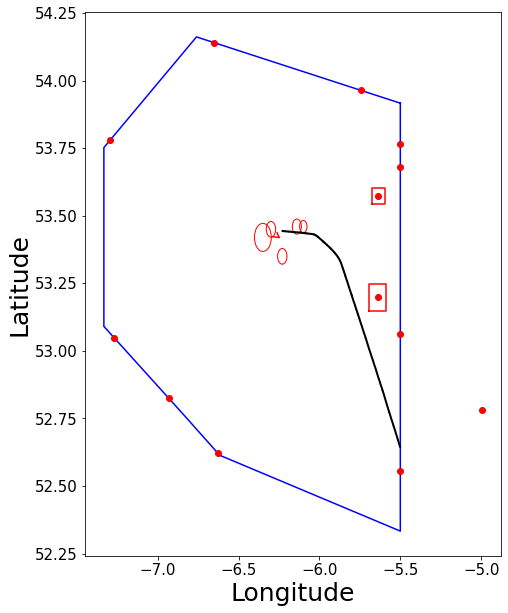

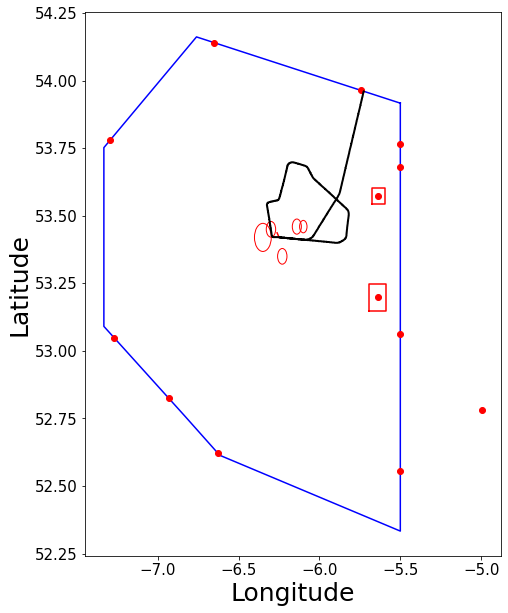

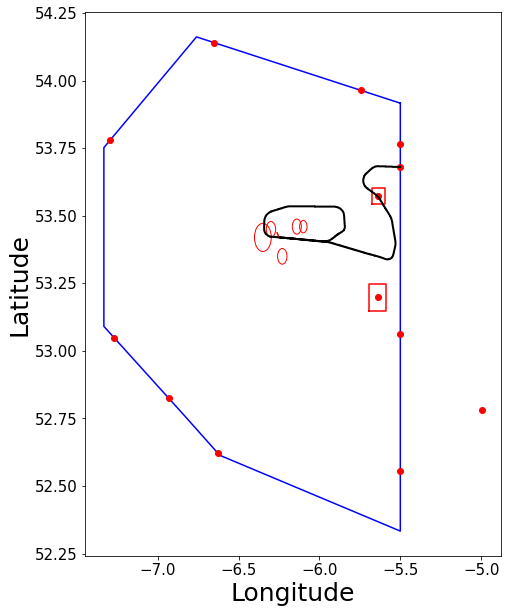

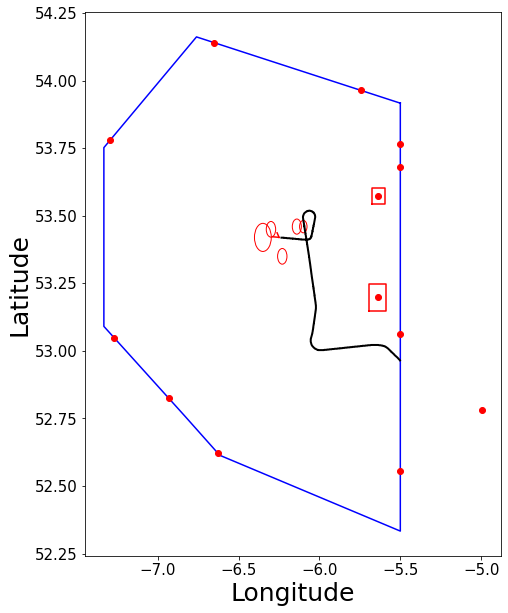

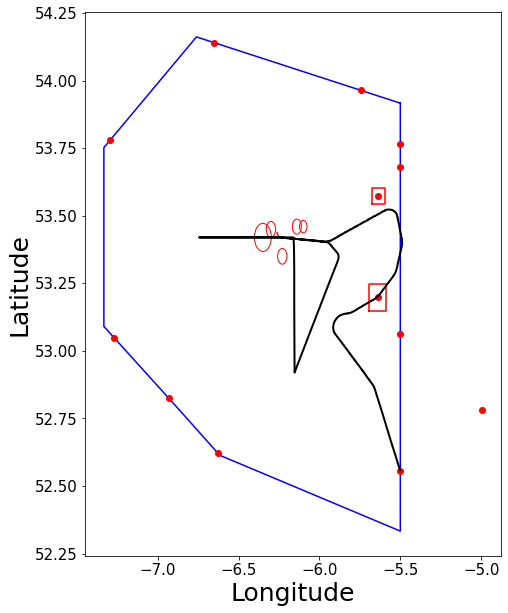

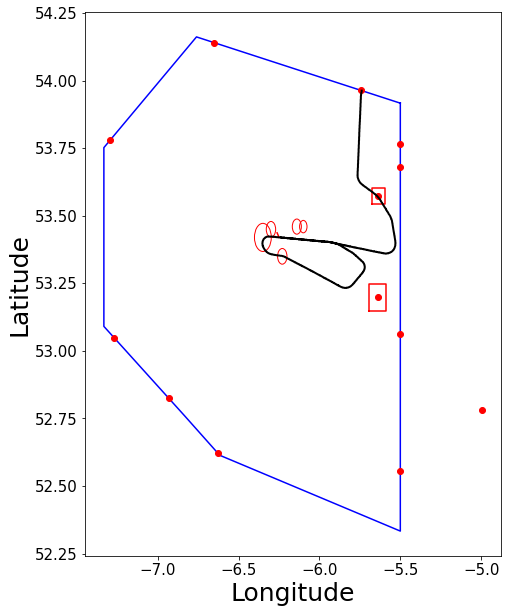

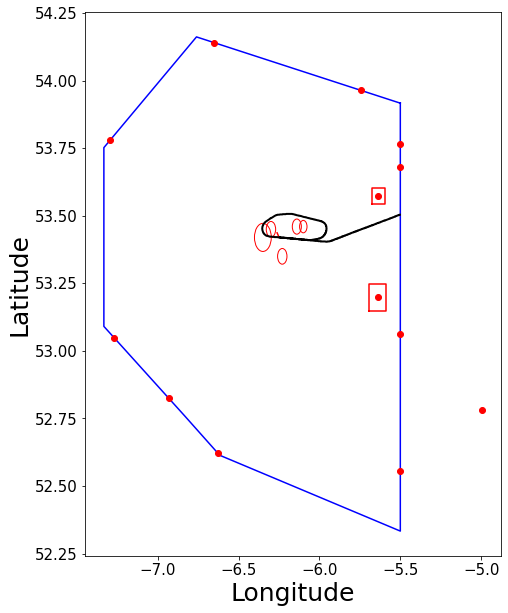

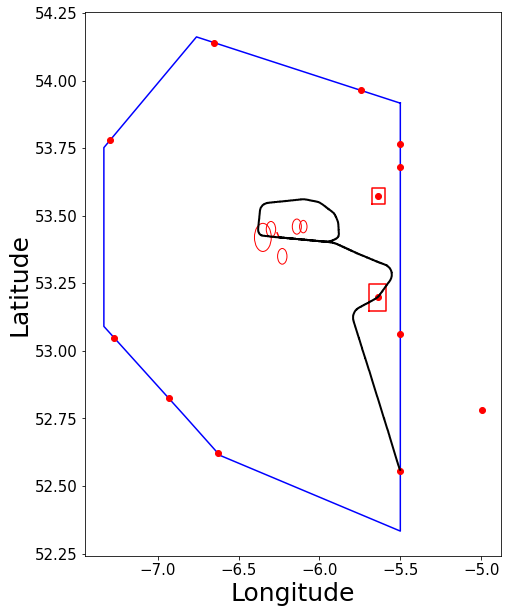

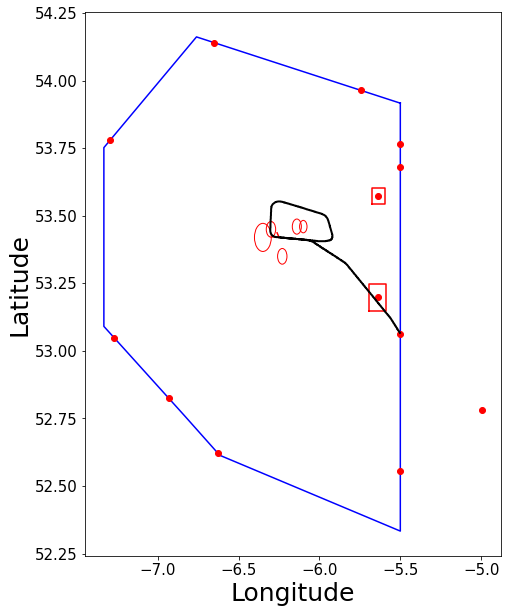

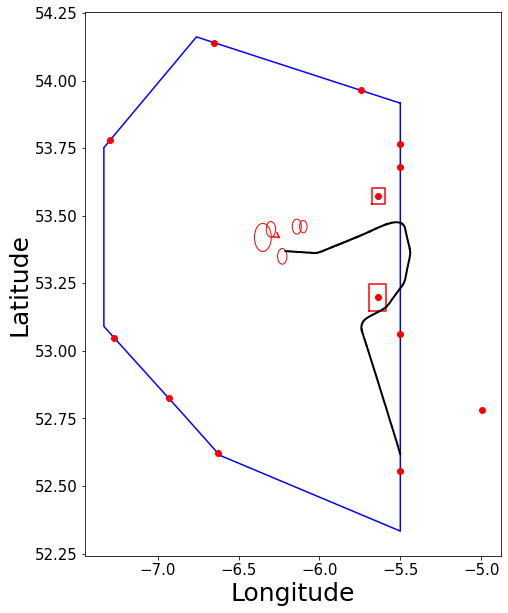

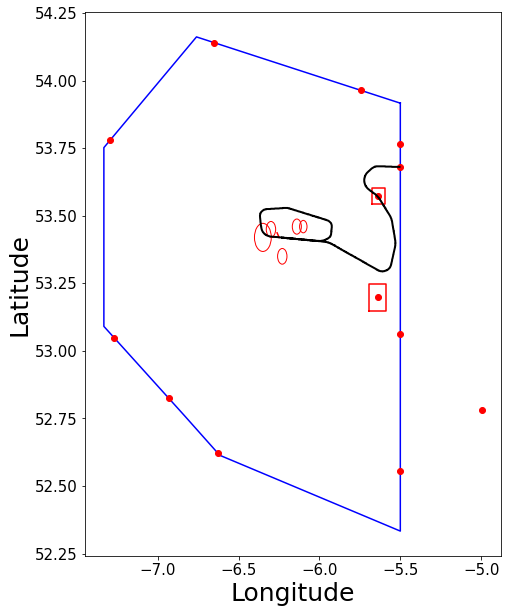

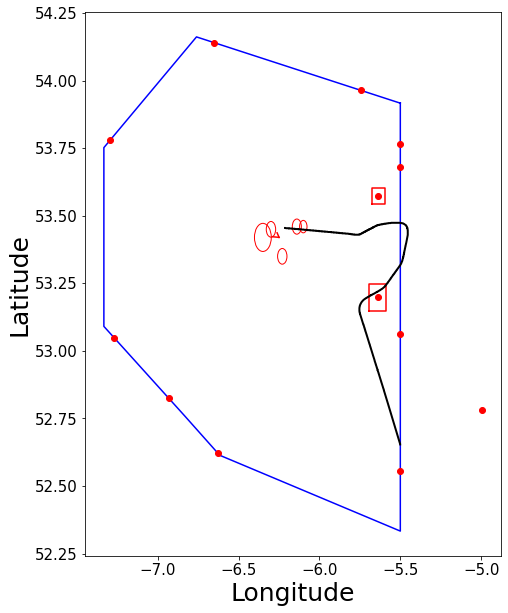

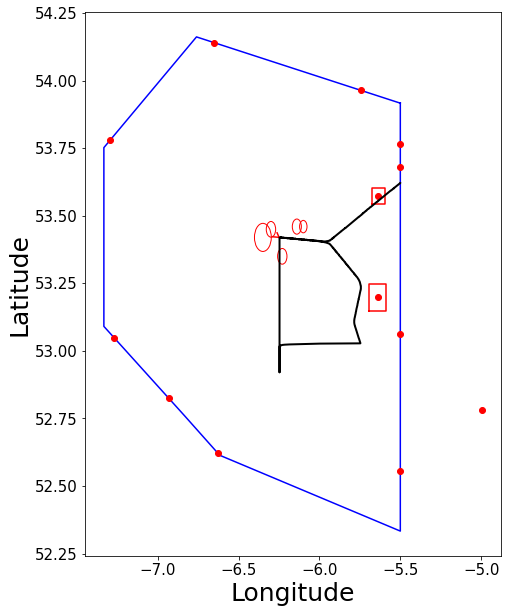

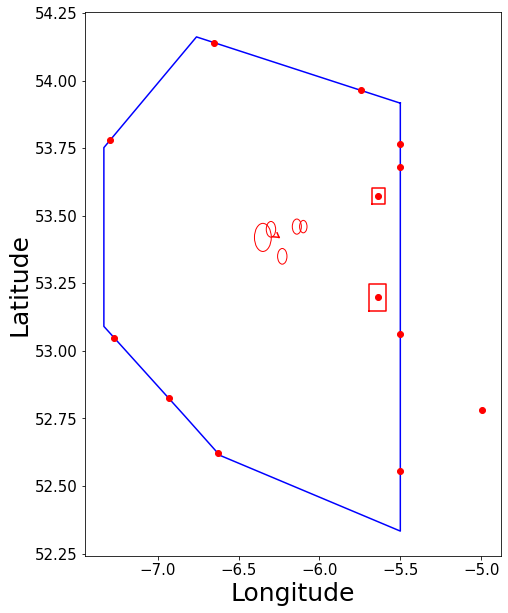

In [39]:
df = dataset_TT_df
for flight_id in removed_flight_ids_list:
    flight_df = df[df.index.get_level_values('flight_id') == flight_id]
    plot_horizontal_profile_EIDW(flight_df, "x", 2)

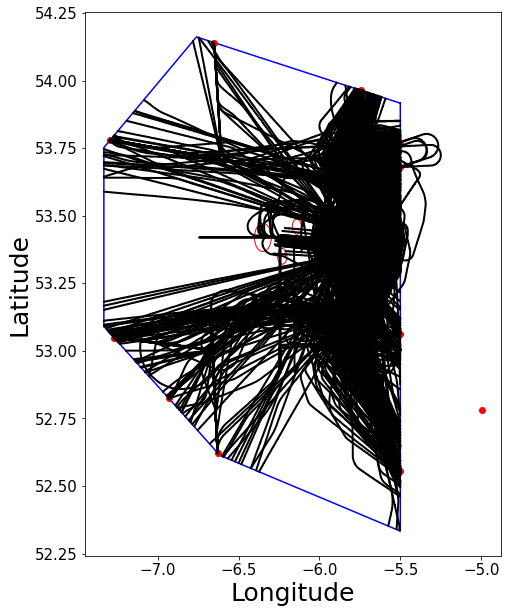

In [25]:
plot_horizontal_profile_EIDW(dataset_TT_df, 'x', 2)

In [ ]:
BOYNE_df = pd.DataFrame()
for flight_id, flight_df in dataset_df.groupby(level='flight_id'):
    
    entry_point_df = horizontal_PIs_by_flight_df[horizontal_PIs_by_flight_df.index.get_level_values('flight_id') == flight_id]
    entry_point = entry_point_df['entry_point'].item()

    if (entry_point == 'BOYNE'):
        BOYNE_df = BOYNE_df.append(flight_df)
        
BOYNE_df.to_csv("BOYNE.scv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)

In [ ]:
number_of_flights = len(BOYNE_df.groupby(level='flight_id'))
print(number_of_flights)
plot_horizontal_profile_EIDW(BOYNE_df, "x", 2)

In [ ]:
BAGSO_df = pd.DataFrame()
for flight_id, flight_df in dataset_df.groupby(level='flight_id'):
    
    entry_point_df = horizontal_PIs_by_flight_df[horizontal_PIs_by_flight_df.index.get_level_values('flight_id') == flight_id]
    entry_point = entry_point_df['entry_point'].item()

    if (entry_point == 'BAGSO'):
        BAGSO_df = BAGSO_df.append(flight_df)
        
BAGSO_df.to_csv("BAGSO.scv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)

In [ ]:
number_of_flights = len(BAGSO_df.groupby(level='flight_id'))
print(number_of_flights)
plot_horizontal_profile_EIDW(BAGSO_df, "x", 2)

In [ ]:
min_add_distance = min(horizontal_PIs_by_flight_df['TMA_additional_distance'])
min_add_distance_df = horizontal_PIs_by_flight_df[horizontal_PIs_by_flight_df['TMA_additional_distance']==min_add_distance]
print(min_add_distance_df)

In [ ]:
# "NIMAT", "BOYNE", "BAGSO", "LIPGO", "ABLIN", "VATRY", "BAMLI", "OLAPO", "OSGAR", "SUTEX", "BUNED"

In [ ]:
def plot_lon_vs_time(flight_df):
    
    temp_df = flight_df.reset_index(drop=False)
    lons=temp_df['lon'].to_list()
    times=temp_df['sequence'].to_list()
    
    plt.plot(times, lons, color="blue")

In [ ]:
#plot_horizontal_profile_EIDW(dataset_PM_df, "x", 2)

In [ ]:
df = dataset_PM_df
flight_df = df[df.index.get_level_values('flight_id') == '191020EIN451']
plot_horizontal_profile_EIDW(flight_df, "x", 2)
plot_STAR_ABLIN()

In [ ]:
df = dataset_PM_df
flight_df = df[df.index.get_level_values('flight_id') == '191024DLH9PX']
#flight_df = df[df.index.get_level_values('flight_id') == '191024EIN65W']
plot_horizontal_profile_EIDW(flight_df, "x", 2)
plot_STAR_BAGSO()

In [ ]:
df = dataset_PM_df
flight_df = df[df.index.get_level_values('flight_id') == '191008STK41D']
#flight_df = df[df.index.get_level_values('flight_id') == '191009STK41D']
plot_horizontal_profile_EIDW(flight_df, "x", 2)
plot_STAR_BAMLI()

In [ ]:
df = dataset_PM_df
flight_df = df[df.index.get_level_values('flight_id') == '191005RYR3NL']
#flight_df = df[df.index.get_level_values('flight_id') == '191004STK1NC']
plot_horizontal_profile_EIDW(flight_df, "x", 2)
plot_STAR_BOYNE()

In [ ]:
df = dataset_PM_df
flight_df = df[df.index.get_level_values('flight_id') == '191006RYR9YR']
#flight_df = df[df.index.get_level_values('flight_id') == '191004RYR65TB']
plot_horizontal_profile_EIDW(flight_df, "x", 2)
plot_STAR_BUNED()

In [ ]:
df = dataset_PM_df
flight_df = df[df.index.get_level_values('flight_id') == '191011SAS99K']
#flight_df = df[df.index.get_level_values('flight_id') == '191024NAX2NU']
plot_horizontal_profile_EIDW(flight_df, "x", 2)
plot_STAR_NIMAT()

In [ ]:
df = dataset_PM_df
flight_df = df[df.index.get_level_values('flight_id') == '191004BBD6809']
#flight_df = df[df.index.get_level_values('flight_id') == '191024EIN142']
plot_horizontal_profile_EIDW(flight_df, "x", 2)
plot_STAR_OLAPO()

In [ ]:
df = dataset_PM_df
flight_df = df[df.index.get_level_values('flight_id') == '191016STK1K']
#flight_df = df[df.index.get_level_values('flight_id') == '191009EIN10X']
plot_horizontal_profile_EIDW(flight_df, "x", 2)
plot_STAR_OSGAR()

In [ ]:
df = dataset_PM_df
flight_df = df[df.index.get_level_values('flight_id') == '191006EIN573']
#flight_df = df[df.index.get_level_values('flight_id') == '191001UAL126']
plot_horizontal_profile_EIDW(flight_df, "x", 2)
plot_STAR_SUTEX()

In [ ]:
df = dataset_PM_df
flight_df = df[df.index.get_level_values('flight_id') == '191004RYR8MF']
#flight_df = df[df.index.get_level_values('flight_id') == '191024RYR34NM']
plot_horizontal_profile_EIDW(flight_df, "x", 2)
plot_STAR_VATRY()

In [ ]:
plot_lon_vs_time(flight_df)

In [ ]:
df = dataset_PM_df
flight_df = df[df.index.get_level_values('flight_id') == '191013EIN63K']
#flight_df = df[df.index.get_level_values('flight_id') == '191001BAW84DM']
plot_horizontal_profile_EIDW(flight_df, "x", 2)
plot_STAR_ABLIN() # LIPGO

In [ ]:
#plot_lon_vs_time(flight_df)